## Predict Project : Climate Change Classification
## Team_GM6
- Ditheto Mathekga (Team leader )  
-  Njabulo Preysgod Nsibande 
- Sinhle Nkambule  
- Nthapeleng Linah Raphela
- Donovan Makate  
- Bunga Never Valoyi  

© Explore Data Science Academy

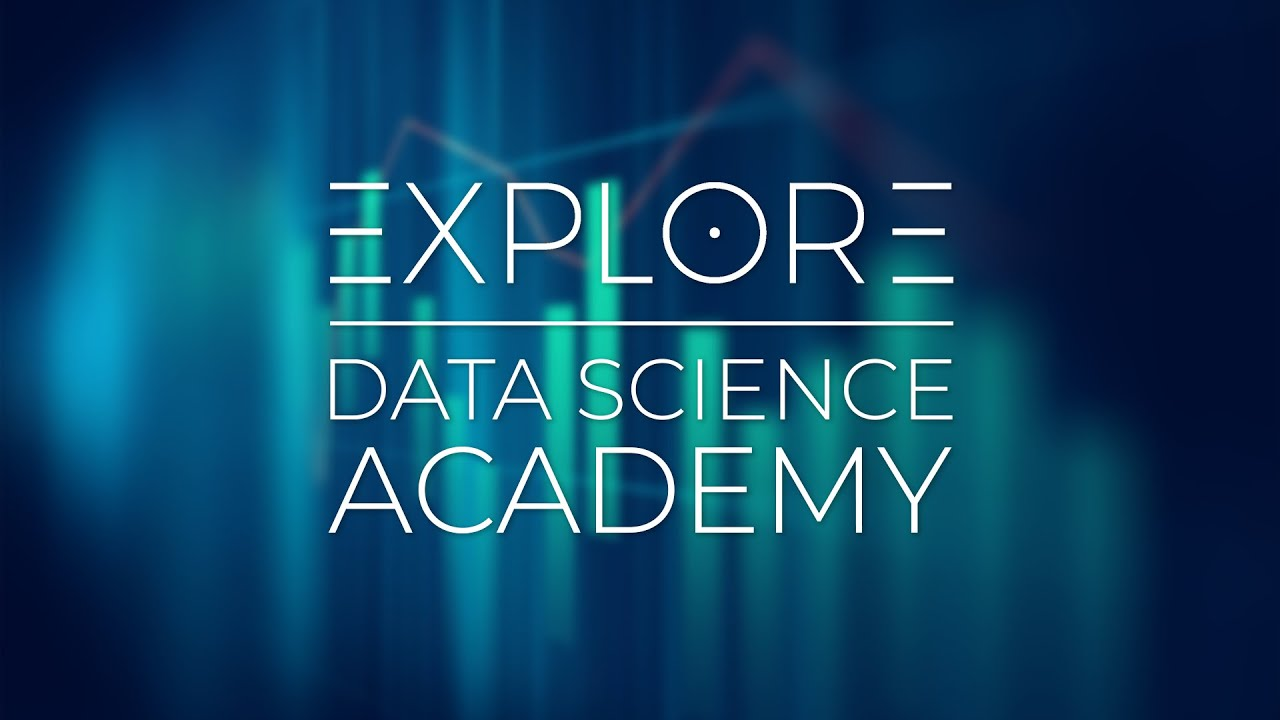

### Honour Code

We TEAM_GM6, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

## 1. Predict Overview: Climate Change Classification

### 1.1. Problem Statement

Many companies are built around reducing their environmental impact or carbon footprint. They offer environmentally friendly and sustainable products and services with respect to their values and ideals. As the climate crisis intensifies and natural disasters become more frequent and powerful, scientists are increasingly turning to social media as a way to assess the damage and impact on a more localized scale. In our case, Twitter was useful given the geographical reach of Twitter as well as the volume and location-specific nature of tweets. The platform can be used to track how individuals feel about climate change and how they view climate change.


### 1.2. Aims and Objectives

The goal of this project is to develop a machine learning model that can rank whether or not someone believes in climate change based on new Twitter data. By providing an accurate and robust solution to this task, we are basically helping companies gain access to a large pool of customer views across many demographic and geographic groups, enabling them to gain new insights and better inform future marketing initiatives.

## Table of Contents

<a href=#one>2. Importing Packages</a>

<a href=#two>3. Importing The Data</a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>5. Data Engineering</a>

<a href=#five>6. Modeling</a>

<a href=#six>7. Model Performance</a>

<a href=#seven>8. Model Explanations</a>

<a href=#seven>9. Generating Submission File</a>

<a href=#seven>10. References</a>

## Creating comet experiment (Complete this section)

from comet_ml import Experiment

#### Create an experiment with your api key
experiment = Experiment(
    api_key="   ",
    project_name="Climate-Change-Predict-GM6",
    workspace="sinhlenkambule78@gmail.com",)

## 2. Importing Packages

In [1]:
# Import library to save model
import pickle

# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Import library for train test split
from sklearn.model_selection import train_test_split

# Import Machine Learning algorithms
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer


# Import libraries for Natural Languge Processing
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

<a id="two"></a>
## 3. Importing The Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we will import the data from the `train` file into a DataFrame. |

---

The preparation dataset is stored in a variable named train, while the test dataset is stored in the test variable.
The following and quite possibly the main cycle is to play out an EDA, which is Exploratory Data Analysis, which includes examining the preparation dataset in other to determine significant bits of knowledge about the information.

In [2]:
# Importing the train & test data sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv')

In [3]:
# View the first 5 rows of the train data
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
# View the first 5 rows of the test data
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


<a id="three"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we will perform an in-depth analysis of all the variables in the DataFrame. |

### Data Description
- -1 Anthropogenic : The tweet does not believe in man-made climate change.
- 0 Neutral : The tweet neither supports nor denied the belief of man-made climate change.
- 1 Prominent : The tweet supports the belief of man-made climate change.
- 2 News : The tweet links to actual news/fact about climate change.

In [7]:
# Checking the data structure and size
train.shape

(15819, 3)

The train dataset is made up 15819 rows and 3 columns.

In [8]:
# Checking Summary Statistics
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [9]:
## getting feature name and their types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The information above indicates that both sentiment and tweet id are Integer datatype .
Object type is thedetected on the message column. 
There are 15819 values in each column, indicating that no value is missing.

In [10]:
# see statistics for categorical features
print("See distribution of messages per sentiment : ")
count = train.groupby("sentiment").count()["message"].reset_index().sort_values(by = "message", ascending = False)
count.style.background_gradient(cmap = "Purples")

See distribution of messages per sentiment : 


,sentiment,message
2,1,8530
3,2,3640
1,0,2353
0,-1,1296


C:\Users\Sinhle Nkambule\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


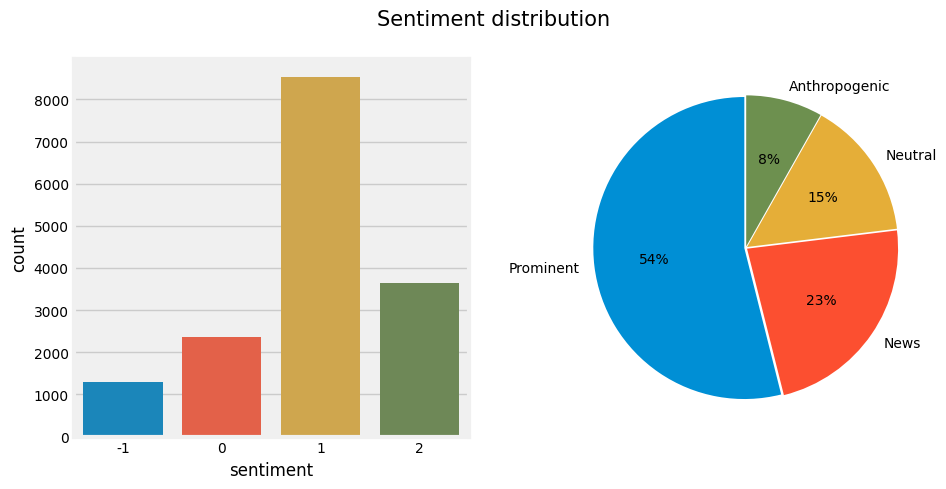

In [46]:
# Display distribution of the sentiment graphically
fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(10, 5), 
                         dpi=100)

sns.countplot(train['sentiment'], ax=axes[0])

code_labels=['Prominent', 'News', 'Neutral', 'Anthropogenic']
axes[1].pie(train['sentiment'].value_counts(),
            labels= code_labels,
            autopct='%1.0f%%',
            startangle=90,
            explode = (0.01, 0.01, 0.01, 0.01))

fig.suptitle('Sentiment distribution', fontsize=15)
plt.show()

##### Quick overview of the data above:
* There is a strong imbalance amongst the sentiments of the tweets.
* Based on the information/sentiments displayed by our histogram, we can see that the vast majority lies within the "1"-sentiment (the tweet that supports the belief of man-made climate change).
* "1"-sentiment (Prominent) dominates the chart with 54% contribution, while "-1"-sentiment (Anthropogenic) only contrinutes with 8%.
* Through the precentages displayed in the pie-chart, we can observe that the majority believes in man-made climate change 

In [13]:
# See statistics for non- numerical features
train.groupby('sentiment').describe(include=['object'])

message                                                            \
            count unique                                                top   
sentiment                                                                     
-1           1296   1222  RT @realDonaldTrump: The concept of global war...   
 0           2353   2245  RT @ULTRAVlOLENCE: Interviewer: 'What do you t...   
 1           8530   7224  RT @StephenSchlegel: she's thinking about how ...   
 2           3640   3542  RT @business: China tells Trump climate change...   

                
          freq  
sentiment       
-1          22  
 0          20  
 1         307  
 2          12

##### Quick observations:
The table above represents the number of tweets and the unique messages for each sentiment and how often that messages appears.
There are a total of 14229 unique tweets. 
The most common tweet for "1"-sentiment class is "RT @StephenSchlegel: she's thinking about how..." with occurrance of 307 times.

##### Corpus of each class sentiment :
We'll now construct a corpus for each sentiment type. Using the corpus, we build a sentiment classifier, that is able to determine positive, negative and neutral sentiments for a document.

In [14]:
# Create a Corpus for every class sentiment 
Neutral_tweets = ' '.join([text for text in train['message']
                        [train['sentiment'] == 0]])
Natural_tweets = ' '.join([text for text in train['message']
                       [train['sentiment'] == -1]])
Anthropogenic_tweets = ' '.join([text for text in train['message']
                           [train['sentiment'] == 1]])
News_tweets = ' '.join([text for text in train['message']
                        [train['sentiment'] == 2]])

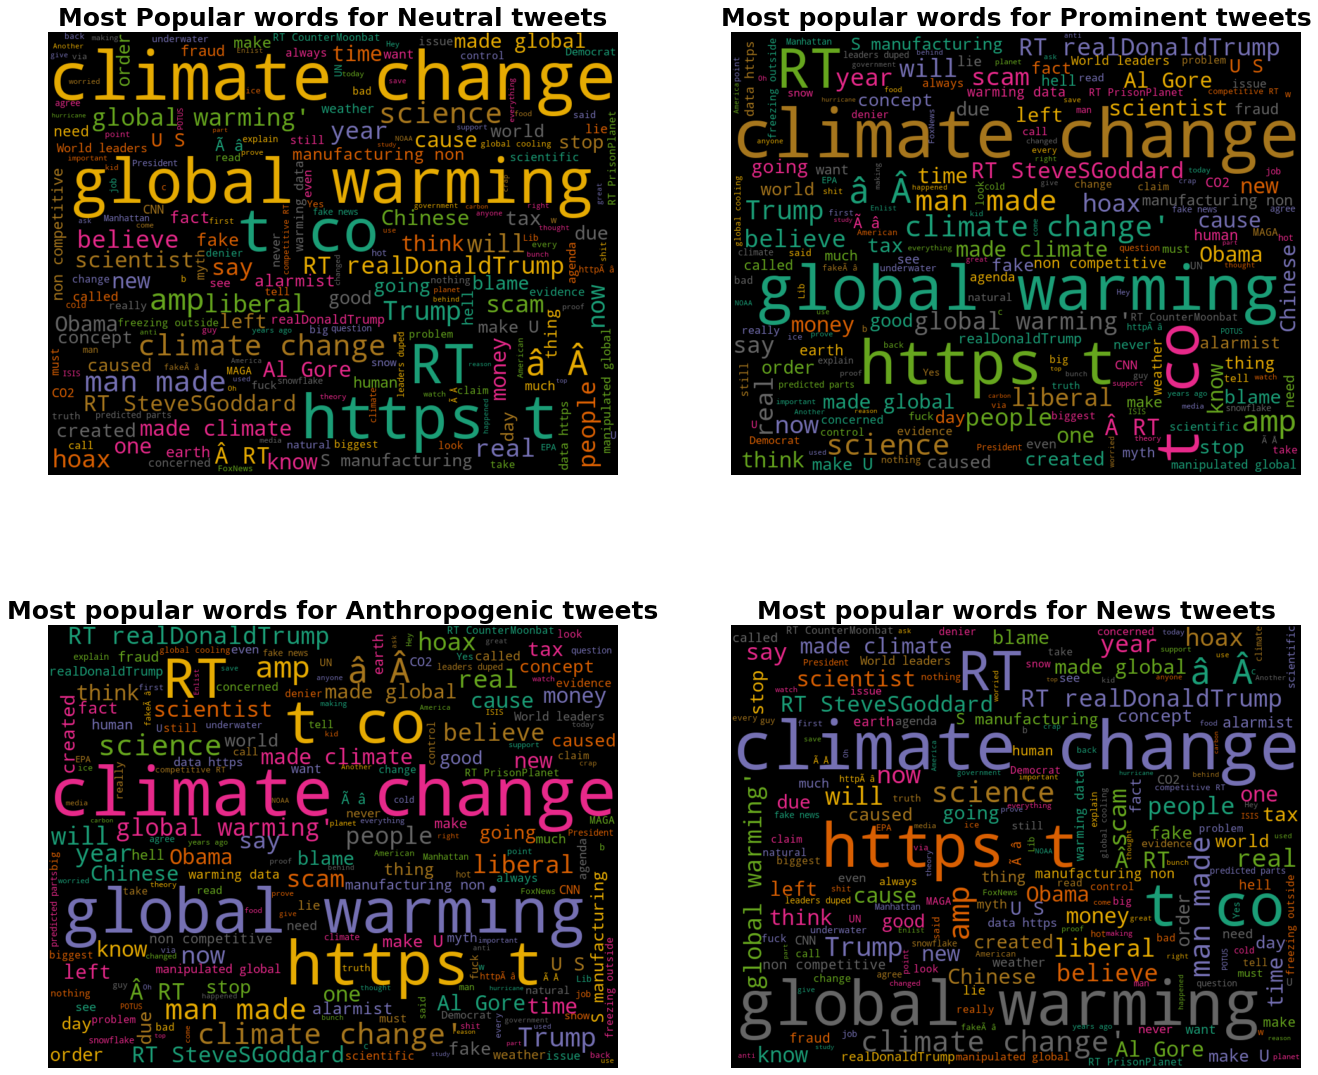

In [15]:
# Visualising each sentiment class according to the count of words
title = ['Most Popular words for Neutral tweets',
              'Most popular words for Prominent tweets',
              'Most popular words for Anthropogenic tweets',
              'Most popular words for News tweets']
list_tweets = [Neutral_tweets, Natural_tweets,
              Anthropogenic_tweets, News_tweets]

# Create word clouds of the most common words in each sentiment class
word_cloud = WordCloud(width=900, height=700, 
               background_color='black', colormap='Dark2',
               max_font_size=200, random_state=42)

plt.rcParams['figure.figsize'] = [20, 20]

# Create subplots 
for i in range(0, len(list_tweets)):
    word_cloud.generate(list_tweets[1])
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title[i], fontsize= 25, fontweight='bold')
    
plt.show()

##### Quick observations:
You can see the top five of the most popular words in all of the four sentiment classes but Climate change and Global Warming will be more useful in our classification.

<a id="four"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section, we will do : data cleaning . |

---

In [16]:
# merging the two data set
df_concat = pd.concat([train,test])

We combined the two data set so that we can work with one data set. Most often, this process is necessary when you have raw data stored in multiple files that you want to analyze all in one go.

In [17]:
# Change upper case to lower case
df_concat ['message'] = df_concat ['message'].apply(lambda x: x.lower())
df_concat .head()

,sentiment,message,tweetid
0,1.0,polyscimajor epa chief doesn't think carbon di...,625221
1,1.0,it's not like we lack evidence of anthropogeni...,126103
2,2.0,rt @rawstory: researchers say we have three ye...,698562
3,1.0,#todayinmaker# wired : 2016 was a pivotal year...,573736
4,1.0,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954


Here we changed all the upper case words in message to lower case. when not converted to the lower case those words are represented as different words in the vector space model (resulting in more dimensions).

In [18]:
# Creating token for the tweets
df_concat['message'] = df_concat['message'].apply(lambda x: word_tokenize(x))
df_concat.head()

,sentiment,message,tweetid
0,1.0,"[polyscimajor, epa, chief, does, n't, think, c...",625221
1,1.0,"[it, 's, not, like, we, lack, evidence, of, an...",126103
2,2.0,"[rt, @, rawstory, :, researchers, say, we, hav...",698562
3,1.0,"[#, todayinmaker, #, wired, :, 2016, was, a, p...",573736
4,1.0,"[rt, @, soynoviodetodas, :, it, 's, 2016, ,, a...",466954


Here we broke each sentence part into pieces. The purpose of tokenization is to protect sensitive data while preserving its business utility.

In [19]:
# Importing stop words from NLTK corpus for english language
stop_words = set(stopwords.words('english'))

In [21]:
# Created tokens without stop words
df_concat['message'] = df_concat['message'].apply(lambda x:[word for word in x if not word in stop_words])

# Tokenized columns with stop words and without stop words
df_concat.head()

,sentiment,message,tweetid
0,1.0,"[polyscimajor, epa, chief, n't, think, carbon,...",625221
1,1.0,"['s, like, lack, evidence, anthropogenic, glob...",126103
2,2.0,"[rt, @, rawstory, :, researchers, say, three, ...",698562
3,1.0,"[#, todayinmaker, #, wired, :, 2016, pivotal, ...",573736
4,1.0,"[rt, @, soynoviodetodas, :, 's, 2016, ,, racis...",466954


## Why are we removing stop words?
- Stop words are often removed from the text before training deep learning and machine learning models since stop words occur in abundance, hence providing little to no unique information that can be used for classification or clustering.

In [22]:
# Created tweets stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer() # PorterStemmer uses Suffix Stripping to produce stems
df_concat['message'] = df_concat['message'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df_concat.head()

,sentiment,message,tweetid
0,1.0,polyscimajor epa chief n't think carbon dioxid...,625221
1,1.0,'s like lack evid anthropogen global warm,126103
2,2.0,rt @ rawstori : research say three year act cl...,698562
3,1.0,# todayinmak # wire : 2016 pivot year war clim...,573736
4,1.0,"rt @ soynoviodetoda : 's 2016 , racist , sexis...",466954


Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

## Feature engineering

In [23]:
# Splitting the data into train & test
train_stemmed = df_concat[:15819]
test_stemmed = df_concat[15819:].drop(['sentiment'], axis=1)

In [24]:
# Setting the parameters for the Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )

CountVectorizer means breaking down a sentence or any text into words by performing preprocessing tasks like converting all words to lowercase, thus removing special characters. In NLP, models can't understand textual data they only accept numbers, so this textual data needs to be vectorized.

In [25]:
# Building a Pipeline for word vectorization
from sklearn.pipeline import Pipeline
pipe = Pipeline( [('vect', vectorizer)] )

A machine learning pipeline is used to help automate machine learning workflows. They operate by enabling a sequence of data to be transformed and correlated together in a model that can be tested and evaluated to achieve an outcome.

In [26]:
# Pickle pipeline for Streamlit App
# Save the Linear SVC model to disk
filename = 'pipeline.pickle'
pickle.dump(pipe, open(filename, 'wb'))

The dump() function is used to store the object data to the pickle file. The dump() function takes 3 arguments. The first argument is the object that you want to store. The second argument is the file object you get by opening the desired file in write-binary (wb) mode.

In [27]:
# Fitting & transforming the data
train_vect = pipe.fit_transform(train_stemmed['message'])
test_vect = pipe.transform(test_stemmed['message'])

 The “fit” embedded is used to learn on the data and acquire state, while the “transform" to actually process the data and generate a prediction.

In [28]:
# Inspecting the shape of our vectorized data
print('train dim:', train_vect.shape, 'test dim:', test_vect.shape)

train dim: (15819, 127149) test dim: (10546, 127149)


<a id="five"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we will create one or more classifying models that are able to accurately classify  whether or not a person believes in climate change, based on their novel tweet data.. |

---

In [30]:
# Splitting the data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(train_vect, train['sentiment'],
                                                    test_size = 0.2, random_state=0,
                                                    stratify=train['sentiment'])

In [31]:
# These are the different Classification models we will train our data on
# Creating a list of names so we can print metrics for the entire list at once
names = ['Logistic Regression'
         ,'Nearest Neighbors'
         , 'Linear SVM']

In [32]:
# These are the different Classifiers we will train our data on
# Creating a list of names so we can print metrics for the entire list at once
classifiers = [
                LogisticRegression(),
                KNeighborsClassifier(3),
                LinearSVC()]

In [33]:
# Training of models, scoring & appending to results list
results = []

# Creating dictionaries to store evaluation results
models = {}
confusion = {}
class_report = {}

# This will calculate the total training time of each model
for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

# This will show us the status of the training
    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

# This will show us the status of the scoring
    print ('... scoring')
    
# These are our evaluation measures
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='macro')
    recall    = metrics.recall_score(y_train, y_pred, average='macro')

    f1        = metrics.f1_score(y_train, y_pred, average='macro')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='macro')

# Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision,
                    recall, f1, f1_test, run_time.best])

# Creating a dataframe of the results to view easily
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy',
                                         'Precision', 'Recall', 'F1 Train',
                                         'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...


C:\Users\Sinhle Nkambule\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sinhle Nkambule\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring


<a id="six"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section, we will compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [34]:
# Viewing the results in a dataframe
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Linear SVM,0.999921,0.999759,0.999867,0.999813,0.671540,2.396250
Logistic Regression,0.999763,0.999589,0.999589,0.999589,0.670438,6.175784
Nearest Neighbors,0.552667,0.589793,0.526674,0.504313,0.376994,0.001325


In [35]:
# Setting the number of folds
kfold = StratifiedKFold( n_splits = 150)


In [36]:
# Linear SVC model
# Set the parameters according to the first run output (C = 0.09)
param_grid2 = {'C': [0.01, 0.03, 0.06, 0.09]}

# Grid Search on the Linear SVC model
gs_sv = GridSearchCV(LinearSVC(), param_grid = [param_grid2], 
                     verbose = 1, cv = kfold, n_jobs = -1)

# Fitting the model to our data
gs_sv.fit(X_train, y_train)

# Find the best estimator
gs_sv_best = gs_sv.best_estimator_

# Print the best parameters
print(gs_sv.best_params_)

# Print the best score
print(gs_sv.best_score_)

Fitting 150 folds for each of 4 candidates, totalling 600 fits
{'C': 0.09}
0.7514771241830065


In [37]:
# Building Linear SVC model with best parameters
lr_svc = LinearSVC(C=0.06)

# Training the model on the whole training dataset
lr_svc.fit(train_vect, train['sentiment'])

# Print the best parameters
print(gs_sv.best_params_)

# Print the best score
print(gs_sv.best_score_)

{'C': 0.09}
0.7514771241830065


In [38]:
# Logistic Regression model
lr = LogisticRegression(class_weight='balanced')
'''The balanced class weight automatically balances data based on the label frequency'''

#Set the parameters according to the first run output (C = 0.09)
lr2_param = {
    'multi_class':[('ovr')],
    'penalty':['l2'],
    'dual':[False],
    'C':[5]   
    }

# Grid Search on the Logistic Regression model
lr_CV = GridSearchCV(lr, param_grid=[lr2_param],
                     cv=kfold, n_jobs=-1, verbose=1)

#  Fitting the model to our data
lr_CV.fit(train_vect, train['sentiment'])

# Print the best parameters
print(lr_CV.best_params_)

# Find the best estimator
logi_best = lr_CV.best_estimator_

# Print the best score
print(lr_CV.best_score_)

Fitting 150 folds for each of 1 candidates, totalling 150 fits


C:\Users\Sinhle Nkambule\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 5, 'dual': False, 'multi_class': 'ovr', 'penalty': 'l2'}
0.7580826594788858


In [39]:
# Building Logistic Regression model with best parameters
lg_reg = LogisticRegression(class_weight='balanced', multi_class=('ovr'), 
                            penalty='l2', dual=False, C=5)

# Training the model on the whole training dataset
lg_reg.fit(train_vect, train['sentiment'])

C:\Users\Sinhle Nkambule\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=5, class_weight='balanced', multi_class='ovr')

In [40]:
# create the ensemble model
estimators = {('linearSVC', lr_svc), ('logistic', lg_reg)}
ensemble = VotingClassifier(estimators)
ensemble.fit(train_vect, train['sentiment'])

# Checking model perfomance
print('accuracy: {}'.format(metrics.accuracy_score(y_train, y_pred)))
print('precision: {}'.format(metrics.precision_score(y_train, y_pred, average='macro')))
print('recall: {}'.format(metrics.recall_score(y_train, y_pred, average='macro')))
print('f1_score: {}'.format(metrics.f1_score(y_train, y_pred, average='macro')))

C:\Users\Sinhle Nkambule\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.9999209798498617
precision: 0.9997591522157996
recall: 0.9998671625929862
f1_score: 0.9998130817183163


<a id="seven"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we will discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

<a id="seven"></a>
## 9. Generating Submission File
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Submision File ⚡ |
| :--------------------------- |
| In this section, we will generate the csv file that we will use for kaggle submission. |

---

In [41]:
# Making predictions on the test data set
submission1 = gs_sv.predict(test_vect)

In [49]:
# Appending the prediction results to the test set, in a new column called 'sentiment'
output = pd.DataFrame( data = {'tweetid': test['tweetid'],
                               'sentiment': submission1 })

# Creating a csv file
#If you don't want to bother with importing csv, you simply can use the following line:
output.to_csv('submission.csv', index = False, quoting = 3)
output

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,2
10544,867455,0


## Conclusion

<a id="seven"></a>
## 10. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: References ⚡ |
| :--------------------------- |
| In this section, we will list all the resources we used to carry out this project. |

---

[external link text](http://www.frontiersin.org/articles/10.3389/fcomm.2021.729818/full)